In [9]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from ast import literal_eval

from importlib import reload
from tblib import lattice
from tblib import hamiltonian
from tblib import sc_AHM
from tblib import plotting
from tblib import superfluid as sf

reload(lattice)
reload(hamiltonian)
reload(sf)
reload(sc_AHM)


<module 'tblib.sc_AHM' from 'c:\\Users\\atsch\\Desktop\\MasterVorlesungen\\Masterthesis\\Code\\tblib\\sc_AHM.py'>

In [ ]:

Us = np.linspace(0.00001,15, 35)

sc_dic = {'U':[], 'mu':[], 'nu':[], 'sq_det_SFW':[], 'SFW_ten':[], 'SFWxx':[], 'SFWxy':[], 'delta':[], 'ns':[], 'deltaError':[], 'nError':[]}

for Uv in Us:
    ham = hamiltonian.Model(N=2, kind='dDSL', delta=[1,1], ns=[0.5,0.5], nu=3, U=[Uv,Uv], mu=[-1,-1])
    dels, nus, mus = sc_AHM.self_consistency_loop(ham,nk=40,HF=True, alpha=0.2, Nmin=10, Nmax=1200)
    
    print('sc ', Uv)
    nu_test = np.sum(ham.striped_props()[2])

    sfws, sdsfw = sf.detSFW(ham,nk=81)

    sc_dic['sq_det_SFW'].append(sdsfw)
    sc_dic['SFW_ten'].append(sfws)
    sc_dic['SFWxx'].append(sfws[0,0])
    sc_dic['SFWxy'].append(sfws[0,1])

    sc_dic['U'].append(Uv)
    sc_dic['mu'].append(ham.mu[0])
    sc_dic['nu'].append(nu_test)
    sc_dic['delta'].append([dels[0,-1],dels[1,-1]])
    sc_dic['ns'].append([nus[0,-1],nus[1,-1]])
    sc_dic['deltaError'].append(np.sum(np.std(np.abs(dels[:,-3:]), axis=1)))
    sc_dic['nError'].append(np.sum(np.std(np.abs(nus[:,-3:]), axis=1)))
    
    print('U, nu, sfw', Uv, nu_test, sfws)

sc_df = pd.DataFrame.from_dict(sc_dic)




sc  1e-05


c:\Users\atsch\Desktop\MasterVorlesungen\Masterthesis\Code\tblib\superfluid.py:88: ComplexWarning: Casting complex values to real discards the imaginary part
  term_array[counter]= np.array([pflist, diali, parli])


U, nu, sfw 1e-05 (2.998314747071705-1.8096725025536814e-32j) [[-3.90390428e-06-7.47383803e-24j -2.55930211e-20+2.04701552e-34j]
 [-8.86976857e-21+2.22270049e-34j -3.90390428e-06-7.47383803e-24j]]
sc  0.4411861764705883
U, nu, sfw 0.4411861764705883 (2.9981175159584663-5.502462415245091e-30j) [[-1.09366952e-01-3.74728887e-19j -3.04819698e-18+1.46724106e-33j]
 [-2.78471486e-18+1.33568281e-33j -1.09366952e-01-3.74728887e-19j]]
sc  0.8823623529411765
U, nu, sfw 0.8823623529411765 (2.997851523490434-4.907382692698933e-30j) [[-1.76328559e-01-7.52778785e-19j -6.22757317e-19+4.82531921e-34j]
 [-1.24063358e-18+4.21900793e-34j -1.76328559e-01-7.52778785e-19j]]
sc  1.3235385294117648
U, nu, sfw 1.3235385294117648 (2.9975940016987837-1.5609750187779134e-30j) [[-2.28484106e-01-1.11944285e-18j  4.21723826e-18+3.07235881e-34j]
 [ 6.08339502e-18+3.44923022e-34j -2.28484106e-01-1.11944285e-18j]]
sc  1.7647147058823531
U, nu, sfw 1.7647147058823531 (2.9972288994693566+7.212701970240905e-31j) [[-2.705963

In [11]:
SFWdf = pd.DataFrame.from_dict(sc_dic)

In [ ]:
SFWdf

,U,mu,nu,sq_det_SFW,SFW_ten,SFWxx,SFWxy,delta,ns,deltaError,nError
0,0.000010,-0.000005+0.000000j,2.998315-0.000000j,0.000004+0.000000j,[[(-3.903904280886941e-06-7.473838027327884e-2...,-0.000004-0.000000j,-2.559302e-20+2.047016e- 34j,[(1.5103056027659365e-06+9.347608878018931e-34...,"[(1.0025000073096222-1.6741642512150487e-32j),...",2.777365e-07,0.000089
1,0.441186,-0.220519+0.000000j,2.998118-0.000000j,0.109367+0.000000j,[[(-0.10936695249581817-3.747288868990302e-19j...,-0.109367-0.000000j,-3.048197e-18+1.467241e- 33j,[(0.021518674140438586+1.9292104451419034e-35j...,"[(1.0001695849740537-5.5027975869231706e-30j),...",1.944131e-07,0.000106
2,0.882362,-0.441013+0.000000j,2.997852-0.000000j,0.176329+0.000000j,[[(-0.17632855896562769-7.527787846244161e-19j...,-0.176329-0.000000j,-6.227573e-19+4.825319e- 34j,"[(0.04628252465689631-6.668390332242585e-34j),...","[(1.0003524035909743-4.8948359907159795e-30j),...",1.451712e-07,0.000122
3,1.323539,-0.661490+0.000000j,2.997594-0.000000j,0.228484+0.000000j,[[(-0.22848410624221147-1.119442847009522e-18j...,-0.228484-0.000000j,4.217238e-18+3.072359e- 34j,"[(0.07601869012892341-8.241327265875843e-33j),...","[(1.0006403662641081-1.5545551702222554e-30j),...",1.389318e-07,0.000134
4,1.764715,-0.881933-0.000000j,2.997229+0.000000j,0.270596+0.000000j,[[(-0.2705963199621006-1.481270939495028e-18j)...,-0.270596-0.000000j,-2.470319e-18-2.288161e- 34j,[(0.11100189934800817-5.8822721332866784e-34j)...,"[(1.001084547763365+7.5413583982257815e-31j), ...",4.282029e-07,0.000149
5,2.205891,-1.102335-0.000000j,2.996780+0.000000j,0.303230+0.000000j,"[[(-0.30323029528941-1.823822582055868e-18j), ...",-0.303230-0.000000j,-6.376118e-18-1.553836e- 33j,"[(0.1506148444873834+7.812148299864675e-34j), ...","[(1.0017417187889754+1.811036978795469e-29j), ...",1.163489e-06,0.000163
6,2.647067,-1.322673-0.000000j,2.996192+0.000000j,0.325613+0.000000j,[[(-0.32561275700722464-2.114517978488398e-18j...,-0.325613-0.000000j,-1.428095e-18-4.653266e- 34j,"[(0.1928385139420187-4.980947800832558e-35j), ...","[(1.0027263614398048+1.2379356711314551e-30j),...",3.198390e-06,0.000181
7,3.088243,-1.542968+0.000000j,2.995602-0.000000j,0.337411+0.000000j,[[(-0.3374108020350776-2.3224458447039728e-18j...,-0.337411-0.000000j,4.302762e-18-7.036947e- 35j,[(0.23463354884831622+2.3348761125303106e-34j)...,"[(1.0040270128018407-1.176364173491508e-28j), ...",1.242114e-05,0.000195
8,3.529419,-1.763302-0.000000j,2.995293+0.000000j,0.339760+0.000000j,[[(-0.33975961659761117-2.4375569098873355e-18...,-0.339760-0.000000j,1.660407e-18+3.344781e- 32j,"[(0.27327997852051455+2.095016816691401e-34j),...","[(1.0053163229006468+3.1929206304295558e-24j),...",6.959157e-05,0.000195
9,3.970596,-1.983899+0.000000j,2.995859-0.000000j,0.334966+0.000000j,[[(-0.33496608804122185-2.471753016827242e-18j...,-0.334966-0.000000j,6.319669e-19+4.352128e- 35j,"[(0.3070230602817735-6.569433705364875e-34j), ...","[(1.0054824757767553-1.3853955636010102e-25j),...",1.412448e-04,0.000157


In [13]:
SFWdf.to_csv('sfw_scmu_35U_0-15_nu_eq_3')

In [126]:
n=3
d = SFWdf.delta.iloc[n]
ns = SFWdf.ns.iloc[n]
Uv = SFWdf.U.iloc[n]
m = SFWdf.mu.iloc[n]
nu = SFWdf.nu.iloc[n]


In [31]:
ham = hamiltonian.Model(N=2, kind='dDSL', delta=d, ns=ns,nu=nu, U=[Uv,Uv], mu=[m,m])


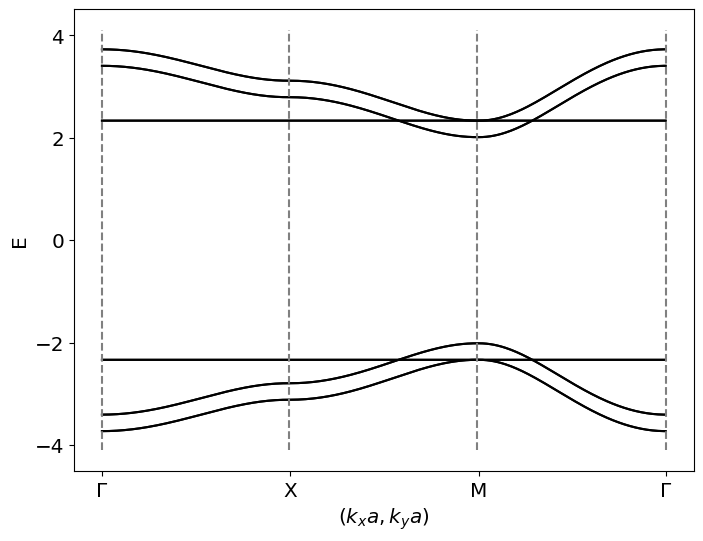

In [32]:
ham.plot_bands()

In [86]:
sfwtab_1 = pd.read_csv(r'sfw_scmu_10U_0-3_nu_eq_3', index_col=0)
sfwtab_1

,U,mu,nu,sq_det_SFW,SFWxx,SFWxy,delta,ns,deltaError,nError,SFWxx_new,SFWxy_new
0,0.001000,(-0.0004998413717437144-1.7883152986734597e-24j),(2.998250462479551-1.2770783474693569e-20j),(2.0869959256948913+5.0612203823638e-19j),[-2.08699594e+00-1.08034290e-18j 2.46342089e-...,[ 2.46342089e-04-1.37995872e-19j -2.08699594e+...,[(0.00014852142469814212+4.245898188581434e-21...,"[(1.0024913268986988-1.3582572839341786e-26j),...",5.789839e-06,0.000093,(-2.0869959402335976-1.080342899881003e-18j),(0.0002463420890672682-1.3799587175375357e-19j)
1,0.334222,(-0.1670536281258514+5.342896739276391e-21j),(2.998082472032473-2.4338357651418266e-19j),(0.20729625221987066+1.1996873502222309e-18j),[-0.21586395-1.44750492e-18j 0.06021219+8.309...,[ 0.06021219+8.30944876e-19j -0.21586395-1.320...,[(0.016209520399599345+1.6523066034928748e-19j...,"[(1.0001523962344394+3.9336683499313177e-22j),...",2.249872e-07,0.000109,(-0.21586394789646124-1.4475049179507481e-18j),(0.06021218993725808+8.309448761303099e-19j)
2,0.667444,(-0.33359952201047194+3.659494579639856e-21j),(2.997935720144892-1.3204024571697615e-19j),(0.27905440740894905+1.801224937368322e-19j),[-0.2943999 -1.44561331e-18j 0.09380799+7.993...,[ 0.09380799+7.99385342e-19j -0.2943999 +5.947...,"[(0.03362825606166449+9.120886015456396e-21j),...","[(1.0002550762878484-6.212278821501623e-21j), ...",1.247976e-07,0.000117,(-0.294399899355937-1.4456133143962643e-18j),(0.0938079871142421+7.993853420272534e-19j)
3,1.000667,(-0.500141372102053+1.1384925767701415e-20j),(2.9978279889286314-1.0616086033107087e-19j),(0.34872161136101437+1.0422249793258574e-18j),[-0.36670703+1.49112532e-19j 0.11343404+1.056...,[ 0.11343404+1.05626294e-18j -0.36670703-2.784...,[(0.053750531341223685-6.550616443576443e-20j)...,"[(1.0004105992614192-1.0725262946414952e-20j),...",5.808863e-07,0.000123,(-0.36670702804013205+1.4911253234749336e-19j),(0.11343404331954067+1.0562629431939354e-18j)
4,1.333889,(-0.666666205271484-4.4091591986218895e-21j),(2.997618664571199+5.675195694735282e-20j),(0.4107128088683177+1.757067651423552e-19j),[-0.4290532 -1.08146169e-18j 0.12410334+9.350...,[ 0.12410334+9.35065232e-19j -0.4290532 +2.041...,"[(0.07678573788529808-4.796497335242036e-21j),...","[(1.0006400306972558+4.846239492376816e-20j), ...",2.433881e-06,0.000133,(-0.42905320243487327-1.0814616898616877e-18j),(0.12410334061221759+9.350652317139577e-19j)
5,1.667111,(-0.8331593075491678-1.882871986632883e-20j),(2.9972655570874336+1.2953854106852917e-19j),(0.4655047288339459+1.503997766519397e-18j),[-0.48276494-1.70210799e-18j 0.12793487+9.767...,[ 0.12793487+9.76743854e-19j -0.48276494-1.716...,[(0.10284540264713424-6.3604915109840756e-21j)...,"[(1.000988528110796+2.2528567199640843e-20j), ...",8.443498e-06,0.000148,(-0.48276493561359135-1.7021079915447424e-18j),(0.12793486816041433+9.767438540961293e-19j)
6,2.000333,(-0.9996284552438277+1.9416044911919895e-20j),(2.996883396865896-9.347423760292702e-20j),(0.5127186424551564+1.6321654505186689e-18j),[-0.52801141-3.33498863e-18j 0.12615723+8.242...,[ 0.12615723+8.24281364e-19j -0.52801141-2.286...,"[(0.1317579054981698+4.451549361640573e-22j), ...","[(1.0014576068517942+1.706795958707076e-20j), ...",2.638842e-05,0.000163,(-0.5280114132007423-3.3349886331092585e-18j),(0.12615722789118275+8.242813639430251e-19j)
7,2.333556,(-1.1660934440671564-8.080506315936667e-21j),(2.9965843169901385+4.7864211467860814e-20j),(0.5512892893850049+2.983736889716054e-18j),[-0.56416793-3.77884695e-18j 0.11985648+8.921...,[ 0.11985648+8.92129551e-19j -0.56416793-2.431...,"[(0.1629409529138118-1.2675264339311441e-19j),...","[(1.0020048605541056+6.932566768009252e-22j), ...",7.642690e-05,0.000170,(-0.5641679330739313-3.77884695212444e-18j),(0.11985648133613394+8.921295509385545e-19j)
8,2.666778,(-1.3326341869699307+3.4002121119301665e-20j),(2.996691448888708-1.7021703115694834e-19j),(0.5800250873584806+2.8228993683400964e-18j),[-0.59041638-2.56512686e-18j 0.11028325+1.452...,[ 0.11028325+1.45246141e-19j -0.59041638

In [97]:
n=3
d =sfwtab_1.delta.iloc[n]
ns =sfwtab_1.ns.iloc[n]
mu = sfwtab_1.mu.iloc[n]
nu =sfwtab_1.nu.iloc[n]
Uv = sfwtab_1.U.iloc[n]


In [98]:
m= complex(mu)
nu = complex(nu)

In [99]:
ns=list(literal_eval(ns[1:-1]))
d=list(literal_eval(d[1:-1]))

In [100]:
d

[(0.053750531341223685-6.550616443576443e-20j),
 (0.27687465705030206+3.4400784572571072e-18j)]

In [106]:
ham = hamiltonian.Model(N=2, kind='dDSL', delta=d, ns=ns,nu=nu, U=[Uv,Uv], mu=[m,m])
ham = hamiltonian.Model(N=2, kind='dDSL', delta=[1,1], ns=[0.5,0.5],nu=3, U=[1,1], mu=[0.1,0.1])


In [107]:
nu

(2.9978279889286314-1.0616086033107087e-19j)

In [108]:
ham.Deltra(50,HF=True, alpha=0.7, Nmin=10, Nmax=1300)

(array([[1.        +0.00000000e+00j, 0.77472966-5.33944281e-20j,
         0.6048314 +3.56750231e-20j, 0.47611711-1.72665808e-19j,
         0.37810968-8.22258596e-20j, 0.30316893-7.81050759e-20j,
         0.24568614-4.90302465e-20j, 0.20149673+5.43479893e-20j,
         0.16747553+5.63404398e-20j, 0.14125731+7.48380872e-20j,
         0.12104056+3.97584402e-20j, 0.10544668+3.07535881e-20j,
         0.09341724+1.48869765e-20j, 0.08413774+2.36095166e-20j,
         0.07698039+8.41565823e-21j, 0.0714609 -4.31002782e-20j,
         0.06720541+1.27862769e-20j, 0.06392526-3.81226487e-20j,
         0.06139756-5.79334353e-20j, 0.0594502 -9.63404371e-20j,
         0.05795031-3.96864266e-20j, 0.05679536-5.36964375e-20j,
         0.05590622-1.69696972e-20j, 0.05522187-5.10867068e-20j,
         0.05469525-4.11175291e-20j, 0.05429008-3.00205716e-20j,
         0.05397841-8.32156953e-21j, 0.0537387 -2.31905100e-20j,
         0.05355437-3.10539402e-20j, 0.05341264-2.86373394e-20j,
         0.05330369-5.209

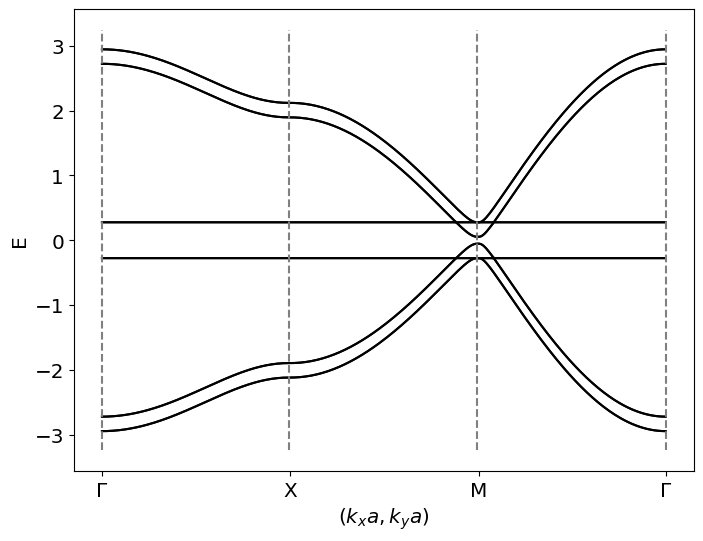

In [109]:
ham.plot_bands()

In [110]:
sdsfwlist = []
for it in range (60,100,10):
    sfws, sdsfw = ham.detSFW(it)
    sdsfwlist.append(sdsfw)
    print(sfws)


[[-4.45369376e-01-1.57643439e-18j -3.79200914e-17+2.36823526e-19j]
 [-3.60697197e-17+2.36823526e-19j -4.45369376e-01+6.57351079e-19j]]


KeyboardInterrupt: 

In [67]:
sdsfwlist

[(0.39711827559663554+2.4220413511566768e-18j),
 (0.3638422493748509-2.3613696123165877e-18j),
 (0.34872161136101437+1.0422249793258574e-18j),
 (0.33997162722756824+9.921755781194246e-19j),
 (0.33426235773986934-2.4785384360116367e-18j),
 (0.33024491450517185-4.791413846997925e-19j),
 (0.3272651774664694-5.449448650420194e-19j),
 (0.32496747538268994-2.6781712188633753e-20j)]

In [74]:
sfws

array([[6.45476684e-01+4.57388841e-19j, 5.35595873e-18-1.54128749e-19j],
       [6.88251539e-18-1.54128749e-19j, 6.45476684e-01+5.95792996e-19j]])

In [ ]:
np.sqrt(np.linalg.det(ten))